In [1]:
import os
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from PIL import Image
from io import BytesIO
import time
import random

In [2]:
class Config:
    dataset_path = "./dataset"
    image_size = 50
    max_images = 1111
    delay = (0.5, 1.5)
    url = "https://ya.ru/images/search?from=tabbar&text=%D1%84%D0%BE%D1%82%D0%BE%D0%B0%D0%BF%D0%BF%D0%B0%D1%80%D0%B0%D1%82&type=clipart&isize=small"
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
    }

os.makedirs(Config.dataset_path, exist_ok=True)

In [3]:
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

In [4]:
def download_images():
    driver = webdriver.Chrome(service=Service('/opt/homebrew/bin/chromedriver'), options=chrome_options)
    driver.get(Config.url)
    time.sleep(5)
    
    images_found = 0

    while images_found < Config.max_images:
        images = driver.find_elements(By.TAG_NAME, "img")
        for img in images[images_found:]:
            src = img.get_attribute("src")
            if src and src.startswith("http"):
                try:
                    response = requests.get(src, headers=Config.headers, timeout=10)
                    img_data = Image.open(BytesIO(response.content)).convert("RGB")
                    img_data = img_data.resize((Config.image_size, Config.image_size))
                    img_path = os.path.join(Config.dataset_path, f"image_{images_found}.jpg")
                    img_data.save(img_path)
                    images_found += 1
                    print(f"downloaded: {img_path}")
                    
                    if images_found >= Config.max_images:
                        break
                    time.sleep(random.uniform(*Config.delay))
                except Exception as e:
                    print(f"error: {e}")
        
        try:
            show_more_button = driver.find_element(By.XPATH, "//button[contains(@class, 'FetchListButton-Button')]")
            if show_more_button.is_displayed():
                show_more_button.click()
                time.sleep(3)
            else:
                break
        except:
            break

    driver.quit()
    print(f"total: {images_found}")

In [5]:
download_images()

downloaded: ./dataset/image_0.jpg
downloaded: ./dataset/image_1.jpg
downloaded: ./dataset/image_2.jpg
downloaded: ./dataset/image_3.jpg
downloaded: ./dataset/image_4.jpg
downloaded: ./dataset/image_5.jpg
downloaded: ./dataset/image_6.jpg
downloaded: ./dataset/image_7.jpg
downloaded: ./dataset/image_8.jpg
downloaded: ./dataset/image_9.jpg
downloaded: ./dataset/image_10.jpg
downloaded: ./dataset/image_11.jpg
downloaded: ./dataset/image_12.jpg
downloaded: ./dataset/image_13.jpg
downloaded: ./dataset/image_14.jpg
downloaded: ./dataset/image_15.jpg
downloaded: ./dataset/image_16.jpg
downloaded: ./dataset/image_17.jpg
downloaded: ./dataset/image_18.jpg
downloaded: ./dataset/image_19.jpg
downloaded: ./dataset/image_20.jpg
downloaded: ./dataset/image_21.jpg
downloaded: ./dataset/image_22.jpg
downloaded: ./dataset/image_23.jpg
downloaded: ./dataset/image_24.jpg
downloaded: ./dataset/image_25.jpg
downloaded: ./dataset/image_26.jpg
downloaded: ./dataset/image_27.jpg
downloaded: ./dataset/image_28

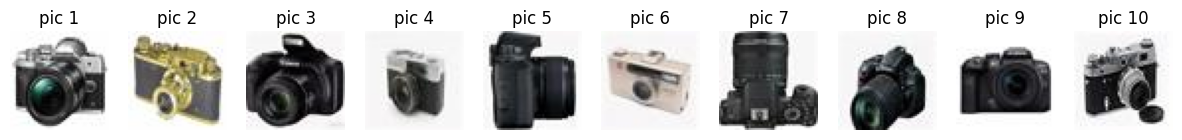

In [13]:
import matplotlib.pyplot as plt

images = os.listdir(Config.dataset_path)[:10]

fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
for i, img_file in enumerate(images):
    img = Image.open(os.path.join(Config.dataset_path, img_file))
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"pic {i+1}")
plt.show()